In [241]:
import pymongo

import pandas as pd
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["movies"]

In [242]:
print(myclient.list_database_names())

['admin', 'config', 'local', 'movies']


In [243]:
metadata= mydb["metadata"]


In [244]:
cursor = mydb["metadata"].find()
df =  pd.DataFrame(list(cursor))

In [245]:
myquery = { "title":  "Jumanji"   }
mydoc = metadata.find(myquery)
for x in mydoc:
  print(x) 

{'_id': ObjectId('5ec6a3eab3bf191d49e94b9f'), 'adult': 'False', 'belongs_to_collection': None, 'budget': '65000000', 'genres': "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]", 'homepage': None, 'id': '8844', 'imdb_id': 'tt0113497', 'original_language': 'en', 'original_title': 'Jumanji', 'overview': "When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.", 'popularity': 17.015539, 'poster_path': '/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg', 'production_companies': "[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]", 'production_co

In [246]:
agr=[{"$group" : {"_id" : "$original_language", "count_movies_inlang" : {"$sum" : 1}}}]
val = list(mydb.metadata.aggregate(agr))
print(val)

[{'_id': 'el', 'count_movies_inlang': 113}, {'_id': 'bn', 'count_movies_inlang': 29}, {'_id': 'gl', 'count_movies_inlang': 1}, {'_id': None, 'count_movies_inlang': 11}, {'_id': 'lt', 'count_movies_inlang': 9}, {'_id': 'uz', 'count_movies_inlang': 1}, {'_id': 'ro', 'count_movies_inlang': 57}, {'_id': 'is', 'count_movies_inlang': 24}, {'_id': 'cs', 'count_movies_inlang': 130}, {'_id': 'lv', 'count_movies_inlang': 18}, {'_id': 'qu', 'count_movies_inlang': 1}, {'_id': 'hr', 'count_movies_inlang': 29}, {'_id': 'vi', 'count_movies_inlang': 10}, {'_id': 'ku', 'count_movies_inlang': 3}, {'_id': 'es', 'count_movies_inlang': 994}, {'_id': 'eo', 'count_movies_inlang': 1}, {'_id': 'pl', 'count_movies_inlang': 219}, {'_id': 'ur', 'count_movies_inlang': 8}, {'_id': 'sq', 'count_movies_inlang': 5}, {'_id': 'am', 'count_movies_inlang': 2}, {'_id': 'et', 'count_movies_inlang': 24}, {'_id': 'ru', 'count_movies_inlang': 826}, {'_id': 'bs', 'count_movies_inlang': 14}, {'_id': 'ne', 'count_movies_inlang': 

In [247]:
print(list(val))

[{'_id': 'el', 'count_movies_inlang': 113}, {'_id': 'bn', 'count_movies_inlang': 29}, {'_id': 'gl', 'count_movies_inlang': 1}, {'_id': None, 'count_movies_inlang': 11}, {'_id': 'lt', 'count_movies_inlang': 9}, {'_id': 'uz', 'count_movies_inlang': 1}, {'_id': 'ro', 'count_movies_inlang': 57}, {'_id': 'is', 'count_movies_inlang': 24}, {'_id': 'cs', 'count_movies_inlang': 130}, {'_id': 'lv', 'count_movies_inlang': 18}, {'_id': 'qu', 'count_movies_inlang': 1}, {'_id': 'hr', 'count_movies_inlang': 29}, {'_id': 'vi', 'count_movies_inlang': 10}, {'_id': 'ku', 'count_movies_inlang': 3}, {'_id': 'es', 'count_movies_inlang': 994}, {'_id': 'eo', 'count_movies_inlang': 1}, {'_id': 'pl', 'count_movies_inlang': 219}, {'_id': 'ur', 'count_movies_inlang': 8}, {'_id': 'sq', 'count_movies_inlang': 5}, {'_id': 'am', 'count_movies_inlang': 2}, {'_id': 'et', 'count_movies_inlang': 24}, {'_id': 'ru', 'count_movies_inlang': 826}, {'_id': 'bs', 'count_movies_inlang': 14}, {'_id': 'ne', 'count_movies_inlang': 

In [248]:
df.head()

,_id,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,5ec6a3eab3bf191d49e94b9e,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,Toy Story,False,7.7,5415.0
1,5ec6a3eab3bf191d49e94b9f,False,None,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",None,8844,tt0113497,en,Jumanji,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,5ec6a3eab3bf191d49e94ba0,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",None,15602,tt0113228,en,Grumpier Old Men,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,5ec6a3eab3bf191d49e94ba1,False,None,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",None,31357,tt0114885,en,Waiting to Exhale,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,5ec6a3eab3bf191d49e94ba2,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",None,11862,tt0113041,en,Father of the Bride Part II,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [249]:
df.isnull().sum()

_id                          0
adult                        0
belongs_to_collection    40970
budget                       0
genres                       0
homepage                 37682
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25053
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [250]:
df=df.drop(['belongs_to_collection'],axis=1)

In [251]:
df.head()

,_id,adult,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,5ec6a3eab3bf191d49e94b9e,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,Toy Story,False,7.7,5415.0
1,5ec6a3eab3bf191d49e94b9f,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",None,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,5ec6a3eab3bf191d49e94ba0,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",None,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,5ec6a3eab3bf191d49e94ba1,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",None,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,5ec6a3eab3bf191d49e94ba2,False,0,"[{'id': 35, 'name': 'Comedy'}]",None,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [252]:
df_numeric = df[['budget','popularity','revenue','runtime','vote_average','vote_count','title']]

In [253]:
df_numeric.isnull().sum()

budget            0
popularity        5
revenue           6
runtime         263
vote_average      6
vote_count        6
title             6
dtype: int64

In [254]:
df_numeric.dropna(inplace=True)

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [255]:
df_numeric.isnull().sum()

budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
title           0
dtype: int64

In [256]:
df_numeric['vote_count'].describe()

count    45201.000000
mean       110.508993
std        492.648948
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [257]:
df_numeric['vote_count'].quantile(np.arange(.74,1,0.01))

0.74      32.0
0.75      34.0
0.76      37.0
0.77      40.0
0.78      43.0
0.79      46.0
0.80      51.0
0.81      55.0
0.82      61.0
0.83      67.0
0.84      74.0
0.85      83.0
0.86      92.0
0.87     105.0
0.88     119.0
0.89     139.0
0.90     161.0
0.91     193.0
0.92     230.0
0.93     283.0
0.94     349.0
0.95     436.0
0.96     581.0
0.97     828.0
0.98    1244.0
0.99    2197.0
Name: vote_count, dtype: float64

In [258]:
df_numeric = df_numeric[df_numeric['vote_count']>30]

In [214]:
df_numeric.shape

(12176, 7)

In [215]:
from sklearn import preprocessing

In [216]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title',axis=1))

In [217]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-1])

In [218]:
df_numeric_scaled.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,0.078947,0.040082,0.133988,0.092360,0.810526,0.383367
1,0.171053,0.031075,0.094261,0.118586,0.726316,0.169610
2,0.000000,0.021389,0.000000,0.115165,0.684211,0.004343
3,0.042105,0.007045,0.029216,0.144812,0.642105,0.000214
4,0.000000,0.015315,0.027468,0.120867,0.600000,0.010111


In [219]:
from sklearn.cluster import KMeans

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [220]:
import matplotlib.pyplot as plt

In [221]:
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

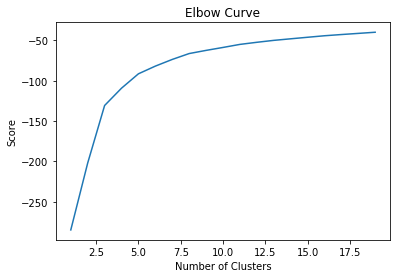

In [222]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [223]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_numeric_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [224]:
len(kmeans.labels_)

12176

In [225]:
df_numeric['cluster'] = kmeans.labels_

In [226]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story,4
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji,2
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,3
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale,3
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,3


Interpret clustering results

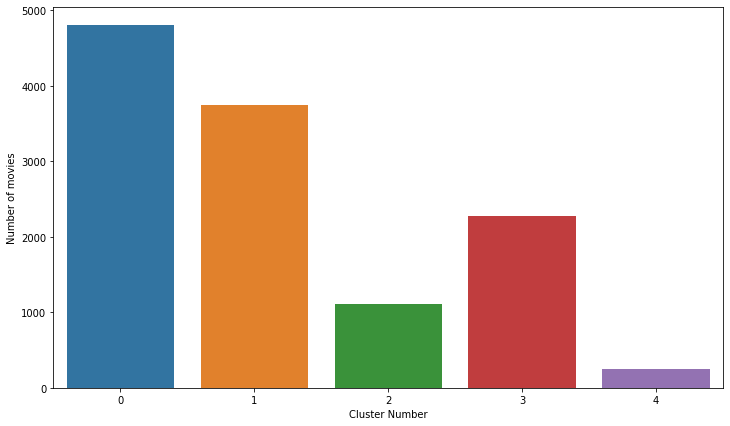

In [167]:

import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df_numeric.groupby(['cluster']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [118]:
cursor = mydb["tmdb_movies"].find()
df2 =  pd.DataFrame(list(cursor))

In [128]:
cursor = mydb["credits"].find()
df1 =  pd.DataFrame(list(cursor))

In [148]:
df.head()

,_id,adult,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,5ec6a3eab3bf191d49e94b9e,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,Toy Story,False,7.7,5415.0
1,5ec6a3eab3bf191d49e94b9f,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",None,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,5ec6a3eab3bf191d49e94ba0,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",None,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,5ec6a3eab3bf191d49e94ba1,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",None,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,5ec6a3eab3bf191d49e94ba2,False,0,"[{'id': 35, 'name': 'Comedy'}]",None,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
df1.colunms = []

In [149]:
df1.columns = ['_id','id','tittle','cast','crew',]
df2= df2.merge(df1,on='id')

In [150]:
df2.head()

,_id_x,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,_id_y,tittle,cast,crew
0,5ec6a495b3bf191d49ea0ffd,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,5ec6a474b3bf191d49e9fd39,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,5ec6a495b3bf191d49ea0ffe,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,5ec6a474b3bf191d49e9fd3a,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,5ec6a495b3bf191d49ea0fff,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,5ec6a474b3bf191d49e9fd3b,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,5ec6a495b3bf191d49ea1000,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,5ec6a474b3bf191d49e9fd3c,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,5ec6a495b3bf191d49ea1001,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,5ec6a474b3bf191d49e9fd3d,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [151]:
C= df2['vote_average'].mean()
C

6.092171559442011

In [152]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [153]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 25)

In [154]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [155]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [156]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

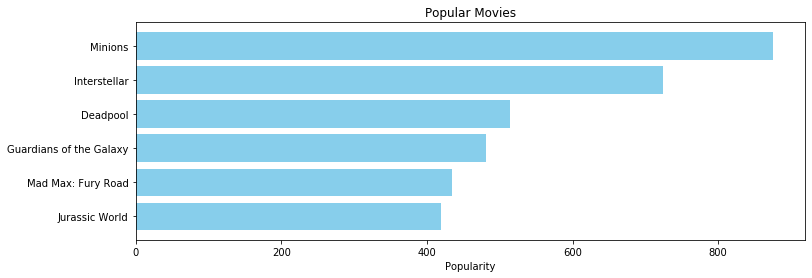

In [157]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [158]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [159]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [160]:


# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)



In [161]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [162]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [163]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [165]:
get_recommendations('American Pie 2')

817     American Wedding
2020          The Rookie
949     American Reunion
2212            Triple 9
2506             Madison
3255          Half Baked
4267              Batman
1887     A Lot Like Love
2813    Think Like a Man
305      Treasure Planet
Name: title, dtype: object